<a href="https://colab.research.google.com/github/LFGuzman2105/proyecto_sp1_IA/blob/master/proyecto_IA_dermatologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [394]:
# ----- Libraries ----- #
import os

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

In [395]:
'''
The dataset you are going to use is the following:
https://archive.ics.uci.edu/ml/datasets/Dermatology
'''

# Retrieve the dataset
if not os.path.exists("dermatology.data"):
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data

In [396]:
# Retrieve the dataset
if not os.path.exists("dermatology.names"):
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.names

In [397]:
# Loading Dataset and have a glimpse about it
column_names = ['erythema',
                'scaling',
                'definite-borders',
                'itching',
                'koebner phenomenon',
                'polygonal papules',
                'follicular papules',
                'oral-mucosal involvement',
                'knee elbow involvement',
                'scalp involvement',
                'family history',
                'melanin incontinence',
                'eosinophils in the infiltrate',
                'pnl infiltrate',
                'fibrosis of the papillary dermis',
                'exocytosis',
                'acanthosis',
                'hyperkeratosis',
                'parakeratosis',
                'clubbing of the rete ridges',
                'elongation of the rete ridges',
                'thinning of the suprapapillary epidermis',
                'spongiform pustule',
                'munro microabcess',
                'focal hypergranulosis',
                'disappearance of the granular layer',
                'vacuolisation and damage of the basal layer',
                'spongiosis',
                'saw-tooth appearance of retes',
                'follicular horn plug',
                'perifollicular parakeratosis',
                'inflammatory monoluclear infiltrate',
                'band-like infiltrate',
                'age',
                'class']

raw_dataset = pd.read_csv("dermatology.data",
                          names=column_names,
                          header=None,
                          na_values = "?")

In [398]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

erythema                                       0
scaling                                        0
definite-borders                               0
itching                                        0
koebner phenomenon                             0
polygonal papules                              0
follicular papules                             0
oral-mucosal involvement                       0
knee elbow involvement                         0
scalp involvement                              0
family history                                 0
melanin incontinence                           0
eosinophils in the infiltrate                  0
pnl infiltrate                                 0
fibrosis of the papillary dermis               0
exocytosis                                     0
acanthosis                                     0
hyperkeratosis                                 0
parakeratosis                                  0
clubbing of the rete ridges                    0
elongation of the re

In [399]:
imputer = SimpleImputer(strategy='mean')
new_dataset.iloc[:, :-1] = imputer.fit_transform(new_dataset.iloc[:, :-1])

independent_variables = imputer.fit_transform(new_dataset.drop('class', axis=1))
dependent_variables = new_dataset['class'].astype(int)

In [400]:
# Balancear con SMOTE
smote = SMOTE(random_state=42)
independent_variables_resampled, dependent_variables_resampled = smote.fit_resample(independent_variables, dependent_variables)

In [401]:
# Escalar
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables_resampled)

In [402]:
# Splitting dataset into training and testing
train_set, test_set, train_target, test_target = train_test_split(independent_variables_scaled,
                                                                  dependent_variables_resampled,
                                                                  test_size=0.2,
                                                                  random_state=42)

# Codificar etiquetas

num_classes = len(np.unique(dependent_variables_resampled))
train_target_cat = tf.keras.utils.to_categorical(train_target - 1, num_classes)  # clases van de 1 a 6
test_target_cat = tf.keras.utils.to_categorical(test_target - 1, num_classes)

In [403]:
train_target_cat, test_target_cat

(array([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        ...,
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0.],

In [404]:
# Build your model!
model = tf.keras.models.Sequential([
          tf.keras.layers.InputLayer(shape=(train_set.shape[1], )),
          tf.keras.layers.Dense(units=128, activation='relu'),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(rate=0.3),
          tf.keras.layers.Dense(units=64, activation='relu'),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(rate=0.3),
          tf.keras.layers.Dense(units=32, activation='relu'),
          tf.keras.layers.Dense(units=16, activation='relu'),
          tf.keras.layers.Dense(units=num_classes, activation='softmax')
        ])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Now compile the model!
model.fit(train_set,
          train_target_cat,
          epochs=50,
          batch_size = 32,
          validation_split=0.1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.2127 - loss: 1.8220 - val_accuracy: 0.5185 - val_loss: 1.6332
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6140 - loss: 1.2389 - val_accuracy: 0.6852 - val_loss: 1.3811
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8035 - loss: 0.8327 - val_accuracy: 0.8704 - val_loss: 1.0700
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8727 - loss: 0.5477 - val_accuracy: 0.9074 - val_loss: 0.7919
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9199 - loss: 0.3824 - val_accuracy: 0.9630 - val_loss: 0.5766
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9425 - loss: 0.2403 - val_accuracy: 0.9815 - val_loss: 0.3946
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9580 - loss: 0.1775 - val_accuracy: 0.9815 - val_loss: 0.2586
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9586 - loss: 0.1282 - val_accuracy: 1.0000 - val_lo

In [405]:
# Evaluate your model
loss, accuracy = model.evaluate(x=test_set, y=test_target_cat, batch_size=32)
print(f"Acurracy: {accuracy * 100:.4f}%")
print(f"Loss: {loss * 100:.4f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9730 - loss: 0.0931 
Acurracy: 97.7612%
Loss: 5.9827%


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


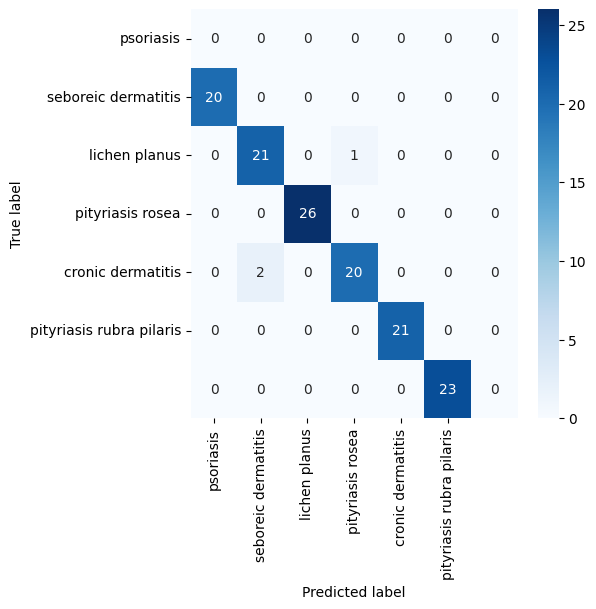

In [406]:
data_labels = ['psoriasis',
               'seboreic dermatitis',
               'lichen planus',
               'pityriasis rosea',
               'cronic dermatitis',
               'pityriasis rubra pilaris']

# Function that plots confusion matrix
# The confusion_matrix function in TensorFlow expects numerical labels (class indices), not string names.
# We will pass the true numerical labels (test_target) to the function.
def plot_confusion_matrix(true_labels, predictions, class_names):
  figure = plt.figure(figsize=(6, 6)) # Increased figure size for better readability
  # Use the true numerical labels for the confusion matrix calculation
  cm = confusion_matrix(labels=true_labels, predictions=predictions)
  # Use the class names for the heatmap annotations for clarity
  sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='d', xticklabels=class_names, yticklabels=class_names)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Confusion Matrix
# Get the predicted class indices
predictions = list(map(lambda x: np.argmax(x), model.predict(test_set)))

# Plot the confusion matrix using the true numerical test_target and the predicted class indices
# The string class_names are passed to the heatmap for labeling the axes.
plot_confusion_matrix(true_labels=test_target, predictions=predictions, class_names=data_labels)